# Assignment-2 (Sampling)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importing Dataset

In [2]:
data=pd.read_csv("Creditcard_data.csv")

## Exploring Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<AxesSubplot: >

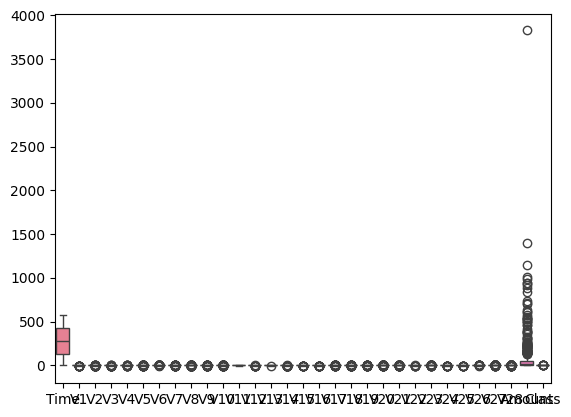

In [5]:
sns.boxplot(data)

## Removing based on outliers of Amount Feature

In [6]:
q1=data.Amount.quantile(0.25)
q3=data.Amount.quantile(0.75)
iqr=q3-q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [7]:
df=data[(data['Amount']>=lower_bound) & (data['Amount']<=upper_bound)]

<AxesSubplot: >

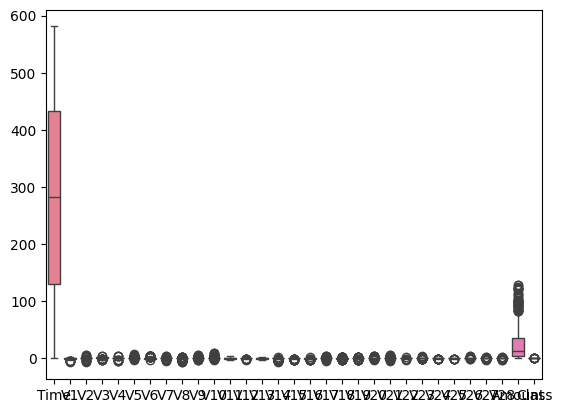

In [8]:
sns.boxplot(df)

## Looking at imbalanced data

In [9]:
df.Class.value_counts()

Class
0    676
1      8
Name: count, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='Count'>

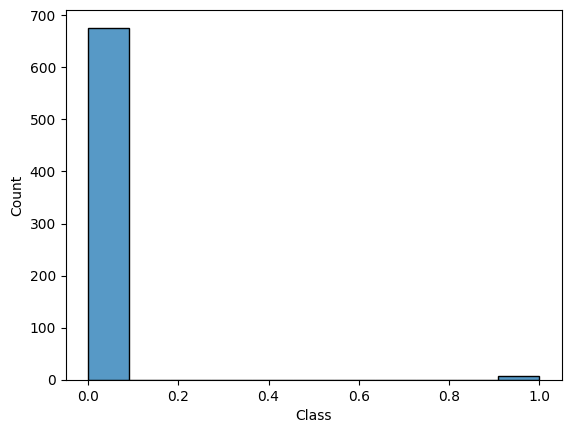

In [10]:
sns.histplot(df.Class)

## Making Dataset balanced

### Removing using Tomek links from majority class

In [11]:
x=df.drop(columns=['Class'])
y=df['Class']

In [12]:
y=pd.DataFrame(y)

In [13]:
y.value_counts()

Class
0        676
1          8
Name: count, dtype: int64

In [14]:
from imblearn.under_sampling import TomekLinks

t1=TomekLinks(sampling_strategy='majority')
x,y=t1.fit_resample(x,y)

In [15]:
y.value_counts()

Class
0        670
1          8
Name: count, dtype: int64

## Using smote technique to oversample minority class to 250 values (adding 242 values)

In [16]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy={1:242+sum(y['Class']==1)},random_state=31)

x,y=smote.fit_resample(x,y)

In [17]:
y.value_counts()

Class
0        670
1        250
Name: count, dtype: int64

## Finally using Nearmiss(version-1) to make the dataset balanced

In [18]:
from imblearn.under_sampling import NearMiss

nearmiss=NearMiss(version=1)

x,y=nearmiss.fit_resample(x,y)

In [19]:
y.value_counts()

Class
0        250
1        250
Name: count, dtype: int64

<AxesSubplot: ylabel='Count'>

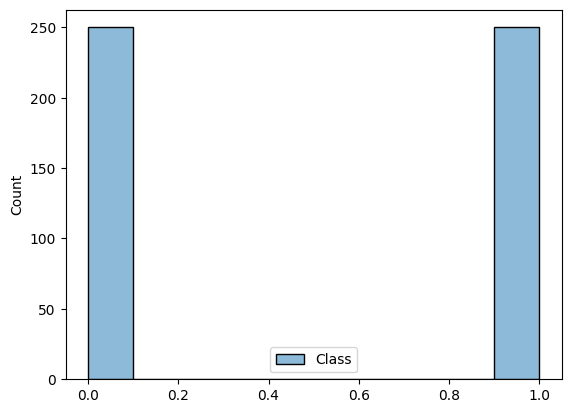

In [20]:
sns.histplot(y)

## Final balanced dataset is obtained of size 500

In [ ]:
x_final_

## The sampling size is calculated to be 385

## Creating 5 samples with different techniques

In [21]:
from sklearn.model_selection import train_test_split

### Simple random sampling

In [22]:
sample1x_train,sample1x_test,sample1y_train,sampley_test=train_test_split(x,y,train_size=0.8,random_state=31)

### Stratified sampling

In [23]:
sample2x_train,sample2x_test,sample2y_train,sample2y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=31)

### Systematic sampling

In [24]:
indices=np.arange(0,500,1.25)
indices=np.round(indices)
temp=list(set(indices))
indices=np.array(temp)
indices=indices.astype(int)
indices

array([  0,   1,   2,   4,   5,   6,   8,   9,  10,  11,  12,  14,  15,
        16,  18,  19,  20,  21,  22,  24,  25,  26,  28,  29,  30,  31,
        32,  34,  35,  36,  38,  39,  40,  41,  42,  44,  45,  46,  48,
        49,  50,  51,  52,  54,  55,  56,  58,  59,  60,  61,  62,  64,
        65,  66,  68,  69,  70,  71,  72,  74,  75,  76,  78,  79,  80,
        81,  82,  84,  85,  86,  88,  89,  90,  91,  92,  94,  95,  96,
        98,  99, 100, 101, 102, 104, 105, 106, 108, 109, 110, 111, 112,
       114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 128, 129,
       130, 131, 132, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145,
       146, 148, 149, 150, 151, 152, 154, 155, 156, 158, 159, 160, 161,
       162, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175, 176, 178,
       179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 194,
       195, 196, 198, 199, 200, 201, 202, 204, 205, 206, 208, 209, 210,
       211, 212, 214, 215, 216, 218, 219, 220, 221, 222, 224, 22

In [25]:
sample3x_train=x.iloc[indices]
sample3x_test=x.iloc[~indices]
sample3y_train=y.iloc[indices]
sample3y_test=y.iloc[~indices]

In [26]:
sample3y_test.value_counts()

Class
0        200
1        200
Name: count, dtype: int64

### Cluster Sampling

In [27]:
np.random.seed(22)
cluster=np.random.randint(0,5,500)
cluster

array([4, 4, 0, 4, 3, 4, 0, 4, 2, 4, 0, 2, 2, 1, 0, 0, 3, 4, 2, 2, 1, 1,
       3, 3, 2, 3, 3, 2, 1, 3, 4, 3, 4, 1, 1, 3, 2, 1, 4, 0, 3, 1, 4, 1,
       1, 4, 1, 4, 3, 3, 4, 3, 4, 0, 2, 3, 3, 4, 4, 0, 1, 0, 0, 1, 0, 0,
       3, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 3, 1, 4, 0, 4, 0, 1, 0, 4,
       4, 3, 0, 0, 2, 4, 0, 1, 0, 2, 2, 2, 4, 4, 4, 3, 3, 0, 1, 2, 3, 0,
       3, 1, 3, 2, 1, 4, 4, 0, 1, 3, 3, 1, 1, 2, 4, 0, 4, 2, 2, 0, 0, 1,
       3, 3, 1, 0, 3, 4, 2, 1, 0, 2, 4, 2, 1, 0, 3, 3, 3, 2, 2, 2, 1, 0,
       4, 0, 0, 4, 2, 4, 3, 1, 3, 4, 3, 2, 2, 3, 3, 2, 2, 4, 3, 2, 1, 0,
       0, 2, 0, 2, 1, 3, 1, 0, 1, 0, 0, 4, 2, 4, 3, 0, 1, 1, 1, 1, 4, 1,
       3, 4, 1, 1, 1, 0, 2, 3, 3, 3, 1, 4, 0, 0, 1, 1, 3, 3, 1, 4, 0, 3,
       1, 3, 2, 3, 3, 4, 3, 0, 4, 3, 3, 3, 4, 2, 0, 0, 1, 3, 4, 3, 3, 2,
       2, 4, 0, 0, 0, 4, 3, 0, 0, 2, 1, 4, 2, 1, 3, 4, 1, 1, 1, 3, 1, 3,
       3, 4, 1, 1, 2, 4, 4, 4, 2, 1, 4, 4, 2, 3, 3, 3, 0, 0, 4, 3, 0, 2,
       0, 2, 1, 0, 4, 4, 3, 0, 1, 4, 1, 3, 1, 4, 0,

In [28]:
x_cluster=x
y_cluster=y

x_cluster['cluster']=cluster
y_cluster['cluster']=cluster

In [29]:
y_cluster.cluster.value_counts()

cluster
3    105
1    102
4     99
0     98
2     96
Name: count, dtype: int64

In [30]:
sample4x_train=x_cluster[x_cluster['cluster']!=4]
sample4x_test=x_cluster[x_cluster['cluster']==4]
sample4y_train=y_cluster[y_cluster['cluster']!=4]
sample4y_test=y_cluster[y_cluster['cluster']==4]

### Convenience Sampling

In [31]:
sample5x_train=x.iloc[:400]
sample5x_test=x.iloc[400:]
sample5y_train=y.iloc[:400]
sample5y_test=y.iloc[400:]